# **Step 1: Import Libraries**

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# **Step 2: Load and Standardize Data**


In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Step 3: Apply t-SNE**

In [3]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create DataFrame for visualization
df_tsne = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
df_tsne['Target'] = y


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


# **Step 4: Visualize t-SNE Output**

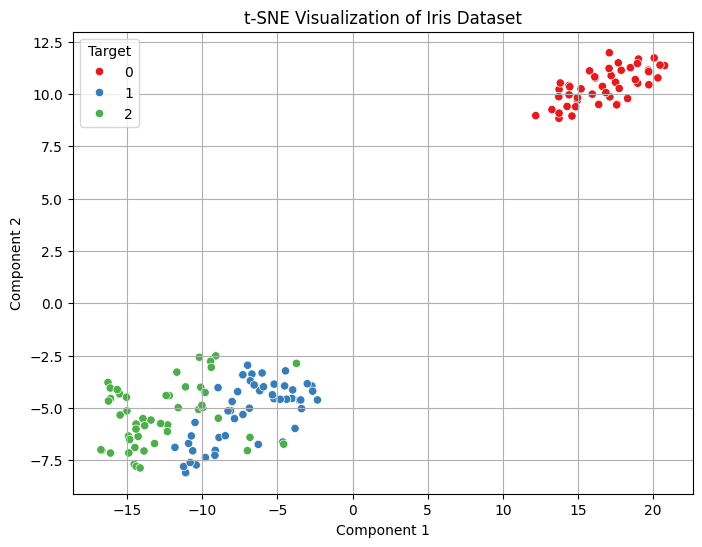

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="Target", palette="Set1")
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [13]:
data=pd.read_csv('/content/fashion-mnist_test.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data.isnull()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

,0
label,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [17]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [18]:
# Extract labels and pixel values
labels = data.iloc[:, 0]  # First column contains labels
pixels = data.iloc[:, 1:]  # Remaining columns are pixel values

In [19]:
# Standardize pixel values
scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

In [20]:
# Apply PCA to reduce dimensions before t-SNE
pca = PCA(n_components=50)
pixels_pca = pca.fit_transform(pixels_scaled)


In [21]:

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
pixels_tsne = tsne.fit_transform(pixels_pca)

In [22]:

# Create DataFrame for visualization
df_tsne = pd.DataFrame(pixels_tsne, columns=["Dim1", "Dim2"])
df_tsne["Label"] = labels

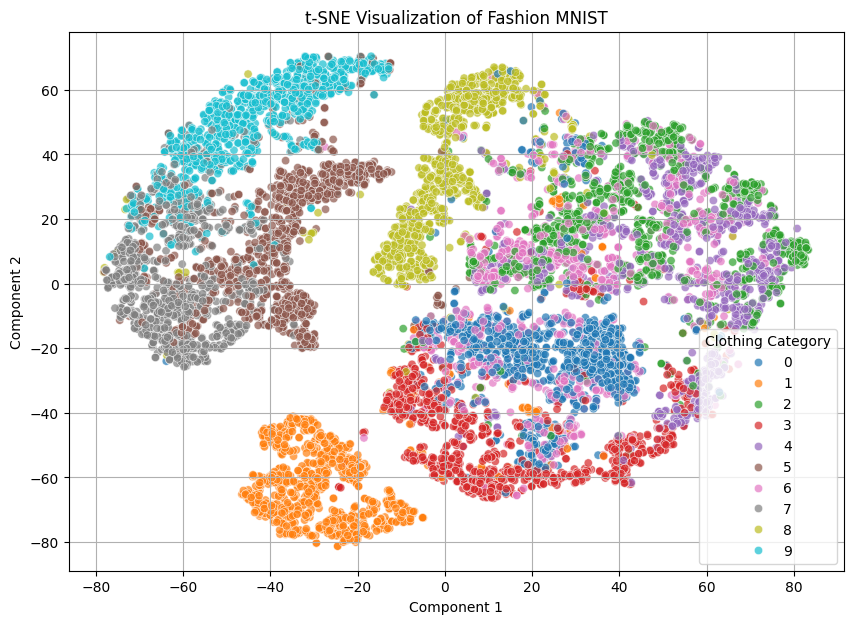

In [23]:
# Plot t-SNE result
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue=df_tsne["Label"], palette="tab10", alpha=0.7)
plt.title("t-SNE Visualization of Fashion MNIST")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Clothing Category")
plt.grid(True)
plt.show()